# Project

In [1]:
# Import necessary librariesdata 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

## 1.Data Wrangling

In [3]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
# Preprocess the Dataset

In [5]:
len(df)

7560

In [6]:
df.shape

(7560, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [8]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [9]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [10]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [11]:
df.rename(columns={'Group': 'Category'}, inplace=True)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.head()

,Date,Time,State,Category,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [14]:
df.dtypes


Date        datetime64[ns]
Time                object
State               object
Category            object
Unit                 int64
Sales                int64
dtype: object

In [15]:
cols = list(df.select_dtypes(np.object_).columns)

In [16]:
df[cols] = df[cols].astype('string')

In [17]:
df.dtypes

Date        datetime64[ns]
Time                string
State               string
Category            string
Unit                 int64
Sales                int64
dtype: object

In [18]:
## Observation
# Since their no null value so no need to drop null
# Since all the **object** types are converted to **string** types, and 'Date' column type is also change to 'datetime' we have formatted them correctly. 
# Columns 'Group' name is changed to 'Category' to make it more sence to that colum and rest of the  column is also looking fine so no need to change them

## 2. Data Analysis

In [19]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None )

In [20]:
# Descriptive statistical analysis 

In [21]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [22]:
# Statewise Sales

In [23]:
state_df = df.groupby('State')['Sales'].sum()

In [24]:
state_df

State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64

In [25]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()

In [26]:
state_sales = state_sales.sort_values(by='Sales', ascending=False)

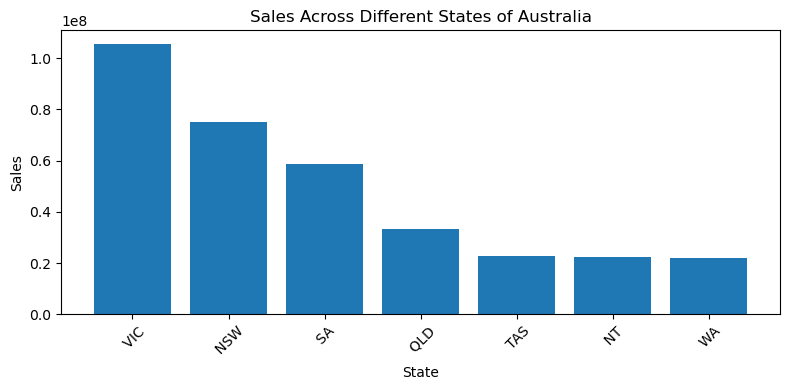

In [27]:
plt.figure(figsize=(8, 4))
plt.bar(state_sales['State'], state_sales['Sales'])
plt.title('Sales Across Different States of Australia')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
highest_sales_state = df.groupby('State')['Sales'].sum().idxmax()
highest_sales_state

' VIC'

In [29]:
lowest_sales_state = df.groupby('State')['Sales'].sum().idxmin()
lowest_sales_state

' WA'

In [30]:
## The number of sales is diggernt in every state
# The VIC state has highest Sales and WA has lowest sales

In [31]:
## CategoryWise Sales

In [32]:
df.groupby('Category').count()['Sales']

Category
Kids       1890
Men        1890
Seniors    1890
Women      1890
Name: Sales, dtype: int64

In [33]:
group_df

NameError: name 'group_df' is not defined

In [ ]:
category_df = df.groupby('Category')['Sales'].sum()
category_df

In [ ]:
highest_sales_category = df.groupby('Category')['Sales'].sum().idxmax()
highest_sales_category

In [ ]:
lowest_sales_category = df.groupby('Category')['Sales'].sum().idxmin()
lowest_sales_category

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

In [ ]:
category_sales = category_sales.sort_values(by='Sales', ascending=False)

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(category_sales['Category'], category_sales['Sales'])
plt.title('Sales in Different Group')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Their is no huge diffeence of sales among all category
## Men Has Higest sales and Senior has lowest sales although differenc is not much as per shown in graph

In [ ]:
# Timewise Sales

In [ ]:
df.groupby('Time').count()['Sales']

In [ ]:
time_df = df.groupby('Time')['Sales'].sum()

In [ ]:
time_df

In [ ]:
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

In [ ]:
time_sales = time_sales.sort_values(by='Sales', ascending=False)

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(time_sales['Time'], time_sales['Sales'])
plt.title('Sales at Different Times of the Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
highest_sales_time = df.groupby('Time')['Sales'].sum().idxmax()

In [ ]:
highest_sales_time

In [ ]:
lowest_sales_time = df.groupby('Time')['Sales'].sum().idxmin()

In [ ]:
lowest_sales_time

In [ ]:
## Their is no huge diffeence of sales in Time of a day
## Morning Has Higest sales and Evening has lowest sales although differenc is not much as per shown in graph

In [ ]:
# Weekly report

In [ ]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [ ]:
weekly_sales = df.resample('W')['Sales'].sum()

In [ ]:
print("Weekly Sales:")
print(weekly_sales)

In [ ]:
# Monthly Report

In [ ]:
monthly_sales = df.resample('M')['Sales'].sum()

In [ ]:
print("\nMonthly Sales:")
print(monthly_sales)

In [ ]:
## Highest Sales is in Month of December and Lowest in month of November

In [ ]:
## Quarterly Report

In [ ]:
quarterly_sales = df.resample('Q')['Sales'].sum()

In [ ]:
print("\nQuarterly Sales:")
print(quarterly_sales)

## 3. Data Visualization

In [34]:
## State-wise sales analysis for different groups 

<Figure size 1200x800 with 0 Axes>

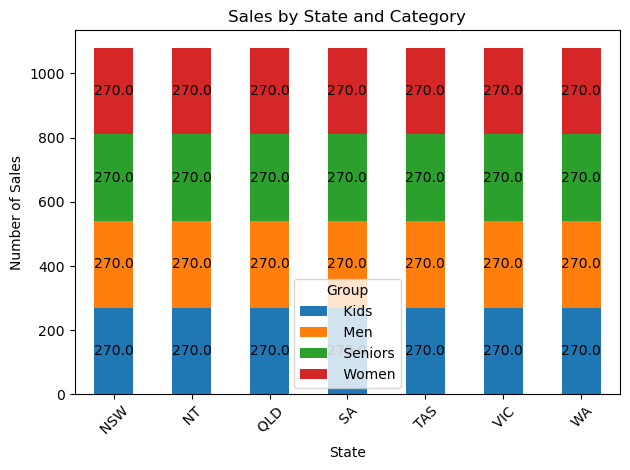

In [35]:
state_category = df.groupby(['State', 'Category']).size().unstack()

# Plotting
plt.figure(figsize=(12, 8))
ax = state_category.plot(kind='bar', stacked=True)

# Annotating bars with actual values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Sales by State and Category')
plt.xlabel('State')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [36]:
## Categorywise sales analysis 

<Figure size 1200x800 with 0 Axes>

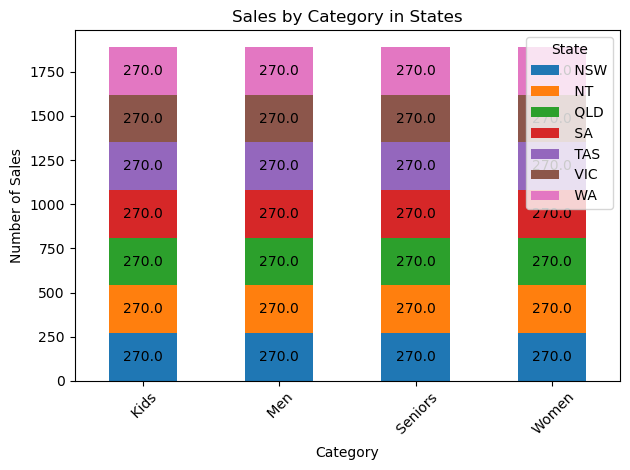

In [37]:
category_state = df.groupby(['Category', 'State']).size().unstack()

# Plotting
plt.figure(figsize=(12, 8))
ax = category_state.plot(kind='bar', stacked=True)

# Annotating bars with actual values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Sales by Category in States')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()

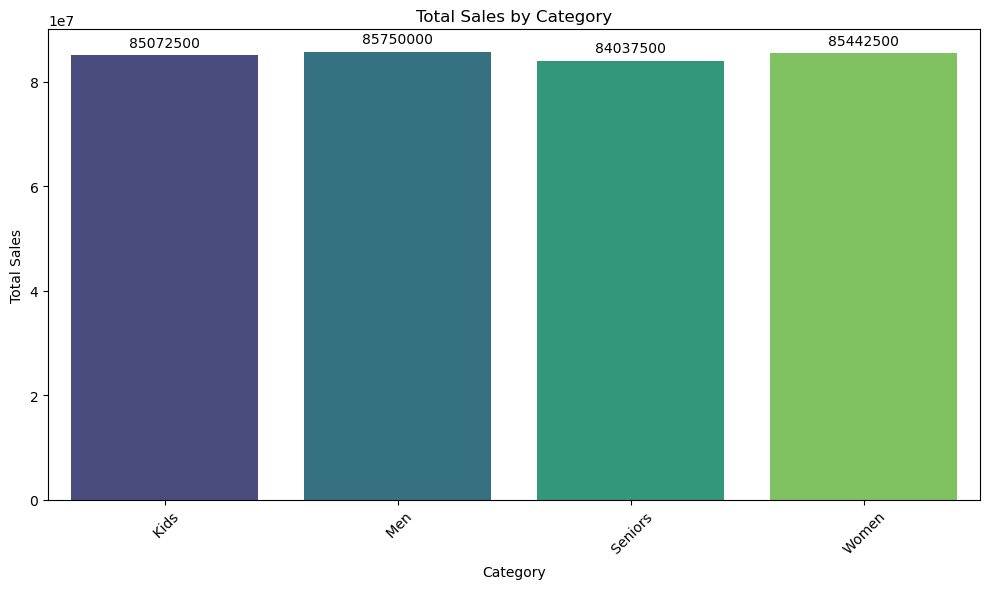

In [38]:
# Calculate total sales for each group
total_sales_category = df.groupby('Category')['Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Sales', data=total_sales_category, palette='viridis')

# Annotating bars with total sales numbers
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
## Time-of-the-day analysis

In [40]:
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

In [41]:
time_sales = time_sales.sort_values(by='Sales', ascending=False)

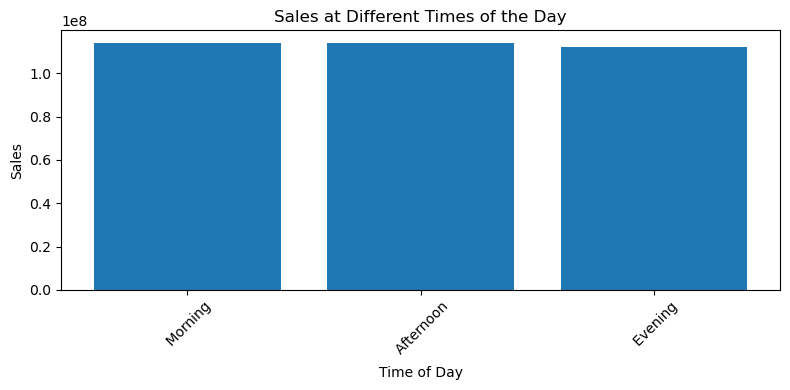

In [42]:
plt.figure(figsize=(8, 4))
plt.bar(time_sales['Time'], time_sales['Sales'])
plt.title('Sales at Different Times of the Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()